# Marvellous Comics: mirror of society?
Superheroes and villains in comics can have a real impact on society. They’re supposed to represent what’s good and bad. Thus, the way the character is portrayed will have an influence on the reader. If for example all villains are part of the same minority, people will unconsciously see them in real life as bad people. Moreover, a character like Tony Stark could inspire people to study engineering. And these are just examples to illustrate the power comics can have on us.
We can thus study this choice of characters, how diverse it is, and if there is a tendency towards a specific portrait for superheroes and villains. 

In [3]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import math
import re
import string
import pickle

In [6]:
marvel_pers = pd.read_pickle("data_pickle/marvel_pers_clean.txt")
dc_pers = pd.read_pickle("data_pickle/dc_pers_clean.txt")

**We tried different plot to see if we still manage to get some informations even with some unknown**

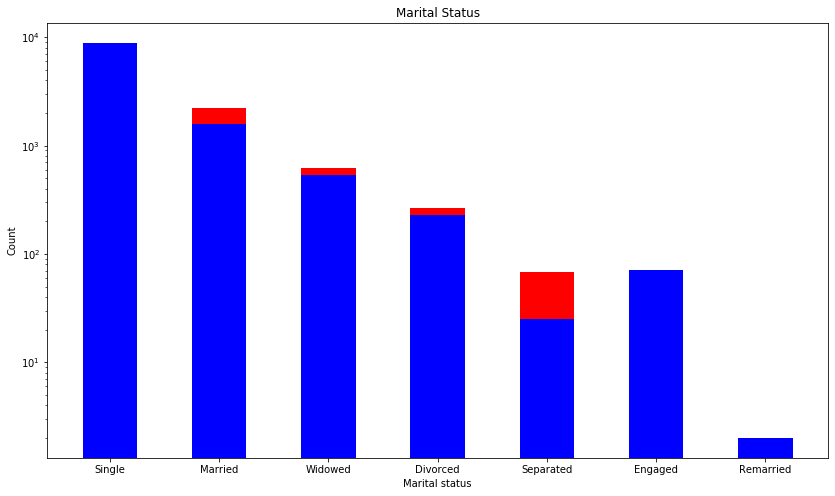

In [12]:
hist_marital = np.array([])
nb_unknown = marvel_pers["Marital Status"].value_counts(normalize=True)['Unknown']
hist_marital_marvel = marvel_pers["Marital Status"].value_counts(normalize=True).drop('Unknown')
nb_unknown = dc_pers["Marital Status"].value_counts(normalize=True)['Unknown']
hist_marital_dc = dc_pers["Marital Status"].value_counts(normalize=True).drop('Unknown')

# Plot histogram
fig, axs = plt.subplots(1, 1, figsize=(14,8))
axs.bar(x = hist_marital_marvel.index, height = hist_marital_marvel, width=0.5, color='red');
axs.bar(x = hist_marital_dc.index, height = hist_marital_dc, width=0.5, color='blue');
axs.set_title('Marital Status')
axs.set_xlabel('Marital status')
axs.set_ylabel('Count')
axs.set_yscale('log')
for i, v in enumerate(hist_marital):
    axs.text(hist_marital_marvel.index[i]-0.25, v*1.05, str(v), color='black', fontsize=12, horizontalalignment='center')

In [45]:
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)

<module 'posixpath' from '/Users/jordanmetz/anaconda3/envs/ada/lib/python3.7/posixpath.py'>

In [93]:
dc_pers

,URL,Real Name,Identity,Current Alias,Citizenship,Good or Bad,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth,Height in string,Height in float,Weight in string,Weight in float
0,https://dc.fandom.com//wiki/Adam_Blake_(The_Nail),Adam Blake,Secret Identity,Captain Comet,Unknown,Good,Unknown,Unknown,Unknown,Male,Unknown,Unknown,Hazel,Brown,Unknown,Unknown,NaN,Unknown,NaN
1,https://dc.fandom.com//wiki/Ada_LaBostrie_(New...,Ada LaBostrie,Public Identity,Ada LaBostrie,American,Good,Married,Housewife,Unknown,Female,Unknown,Unknown,Brown,Black,Unknown,Unknown,NaN,Unknown,NaN
2,https://dc.fandom.com//wiki/Adellca_(New_Earth),Adellca,Secret Identity,Green Lantern,Unknown,Good,Single,Green Lantern,Unknown,Female,Unknown,Unknown,Black,Black,Unknown,Unknown,NaN,Unknown,NaN
3,https://dc.fandom.com//wiki/A-1_(Prime_Earth),Artificial Intelligence Data Flow,Unknown,A-I,Unknown,Good,Single,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN
4,https://dc.fandom.com//wiki/Ace_Egan_(Quality_...,Ace Egan,Secret Identity,Ace of Space,Unknown,Good,Unknown,Unknown,Unknown,Male,Unknown,Unknown,Unknown,Unknown,New York,Unknown,NaN,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22185,https://dc.fandom.com//wiki/Zygo_(Prime_Earth),Unknown,Secret Identity,Zygo,Unknown,Bad,Unknown,Scientist,Unknown,Male,Unknown,Unknown,Brown,Brown,Unknown,Unknown,NaN,Unknown,NaN
22186,https://dc.fandom.com//wiki/Zymyr_(Pre-Zero_Hour),Zymyr,Public Identity,Zymyr,United Planets Citizen,Bad,Single,Scientist,Unknown,Male,Unknown,Unknown,No eyes,No Hair,Gil'Dishpan,Unknown,NaN,Unknown,NaN
22187,https://dc.fandom.com//wiki/Z%C3%BCM_(New_Earth),Unknown,Secret Identity,ZüM,Unknown,Bad,Single,Super-Villain,Unknown,Male,Unknown,Unknown,Unknown,No Hair,Ma'aleca'andra,Unknown,NaN,Unknown,NaN
22188,https://dc.fandom.com//wiki/Zyn_(New_Earth),Zyn,Public Identity,Unknown,Unknown,Bad,Unknown,Mercenary,Unknown,Male,Unknown,Unknown,Unknown,Bald,Unknown,Unknown,NaN,Unknown,NaN


In [92]:
import plotly.graph_objects as go
import chart_studio
import chart_studio.tools as tls
import chart_studio.plotly as py
from IPython.display import HTML

#create figure
fig = go.Figure()
years = range(1930,2021)

#Along the time
for year in years:
    #take statistics
    hist_marital_dc = dc_pers[(dc_pers['Marital Status']!='Unknown')&(year in dc_pers['Marital Status'])]["Marital Status"].value_counts(normalize=True)
    hist_marital_marvel = marvel_pers[marvel_pers['Marital Status']!='Unknown']["Marital Status"].value_counts(normalize=True)

    count_dc = dc_pers[dc_pers['Marital Status']!='Unknown']["Marital Status"].value_counts()
    count_marvel = marvel_pers[marvel_pers['Marital Status']!='Unknown']["Marital Status"].value_counts()

    x1 = hist_marital_marvel.index
    x2 = hist_marital_dc.index



fig.add_bar(name='Marvel', x=x1, y=hist_marital_marvel, text=count_marvel,
            textposition='auto',marker=dict(color="#990000"))
fig.add_bar(name='DC Comic', x=x2, y=hist_marital_dc, text=count_dc,
            textposition='auto',marker=dict(color="#0F4C81"))

# Change the bar mode
fig.update_layout(barmode='group', 
                  title="Marital Status",
                  xaxis_title="Categories",
                  yaxis_title="Proportion in log",
                  yaxis_type="log",
                  font=dict(family='Komika Hand',
                            size=10,
                            color="#7f7f7f"))

fig.show()
chart_studio.tools.set_credentials_file(username='schmider', api_key='OGpZh1yfEHe4hFbVMaPO')
url = py.plot(fig, filename='Marital_Status.html', auto_open=False,)
print(url)
tls.get_embed('https://plot.ly/~schmider/1/') #in '' put the printed url

https://plot.ly/~schmider/8/


'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~schmider/1.embed" height="525" width="100%"></iframe>'

In [86]:
import plotly.graph_objects as go
import chart_studio
import chart_studio.tools as tls
import chart_studio.plotly as py
from IPython.display import HTML
from fontTools.ttLib import TTFont
font = TTFont('/Library/Fonts/Komika_Hand.ttf')

hist_marital_dc = dc_pers[dc_pers['Marital Status']!='Unknown']["Marital Status"].value_counts(normalize=True)
hist_marital_marvel = marvel_pers[marvel_pers['Marital Status']!='Unknown']["Marital Status"].value_counts(normalize=True)

count_dc = dc_pers[dc_pers['Marital Status']!='Unknown']["Marital Status"].value_counts()
count_marvel = marvel_pers[marvel_pers['Marital Status']!='Unknown']["Marital Status"].value_counts()

x1 = hist_marital_marvel.index
x2 = hist_marital_dc.index

fig = go.Figure(data=[
    go.Bar(name='Marvel', x=x1, y=hist_marital_marvel, text=count_marvel,
            textposition='auto')])
go.Bar(name='DC Comic', x=x2, y=hist_marital_dc, text=count_dc,
            textposition='auto')
# Change the bar mode
fig.update_layout(barmode='group', 
                  title="Marital Status",
                  xaxis_title="Categories",
                  yaxis_title="Proportion in log",
                  yaxis_type="log",
                  font=dict(family='Komika Hand',
                            size=10,
                            color="#7f7f7f"))

fig.show()
chart_studio.tools.set_credentials_file(username='schmider', api_key='OGpZh1yfEHe4hFbVMaPO')
url = py.plot(fig, filename='Marital_Status.html', auto_open=False,)
print(url)
tls.get_embed('https://plot.ly/~schmider/1/') #in '' put the printed url

https://plot.ly/~schmider/8/


'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~schmider/1.embed" height="525" width="100%"></iframe>'

In [ ]:
These include "Arial",
                "Balto", "Courier New", "Droid Sans",, "Droid
                Serif", "Droid Sans Mono", "Gravitas One", "Old
                Standard TT", "Open Sans", "Overpass", "PT Sans
                Narrow", "Raleway", "Times New Roman".

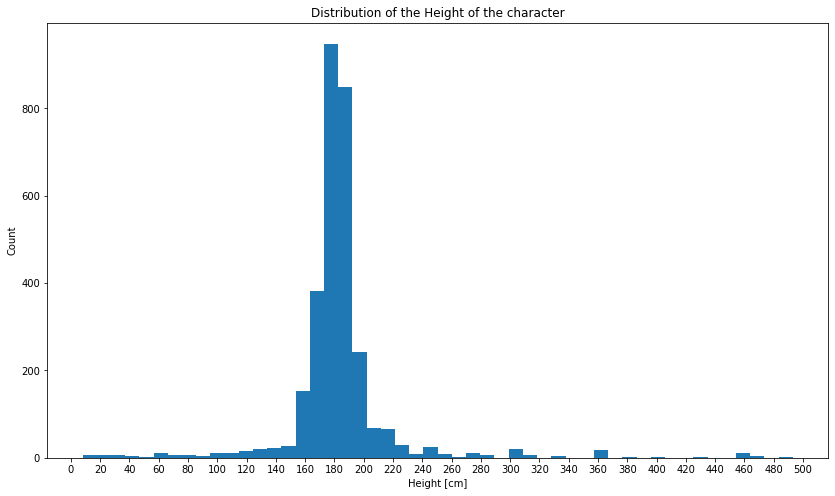

In [4]:
# Plot the distribution of height

# Number of unknown and variable
nb_unknown = marvel_pers["Height"].value_counts()['Unknown']+marvel_pers["Height"].value_counts()['Variable']
# Filter the data to avoid outliers
height_hist = marvel_pers[(marvel_pers["Height in float"]!=np.nan)\
                         &(marvel_pers["Height in float"]<500)]['Height in float']

# Plot histogram
fig, axs = plt.subplots(1, 1, figsize=(14,8))
axs.hist(height_hist,bins=50);
axs.set_title('Distribution of the Height of the character')
axs.set_xlabel('Height [cm]')
axs.set_ylabel('Count')
plt.xticks(np.arange(0, max(height_hist)+10, 20.0));

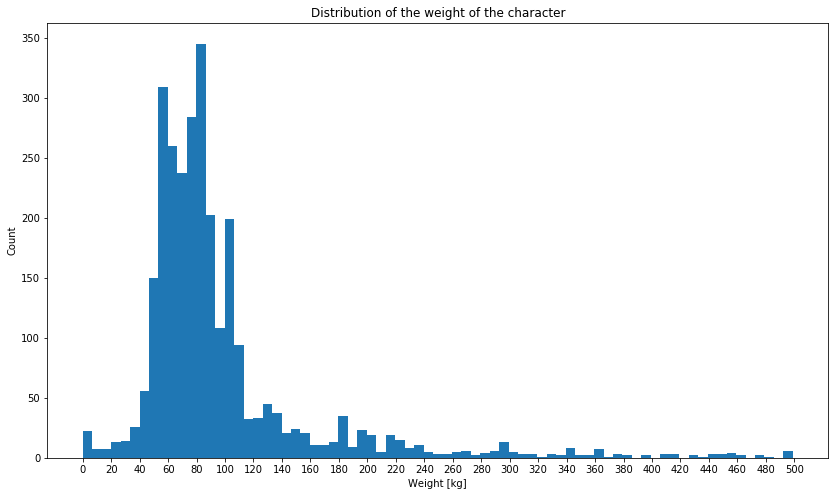

In [5]:
# Plot the distribution of Weight

# Number of unknown and variable
nb_unknown = marvel_pers["Weight"].value_counts()['Unknown']+marvel_pers["Weight"].value_counts()['Variable']
# Filter the data to avoid outliers
weight_hist = marvel_pers[(marvel_pers["Weight in float"]!=np.nan)\
                         &(marvel_pers["Weight in float"]<500)]['Weight in float']

# Plot histogram
fig, axs = plt.subplots(1, 1, figsize=(14,8))
axs.hist(weight_hist,bins=75);
axs.set_title('Distribution of the weight of the character')
axs.set_xlabel('Weight [kg]')
axs.set_ylabel('Count')
plt.xticks(np.arange(0, max(height_hist)+10, 20.0));

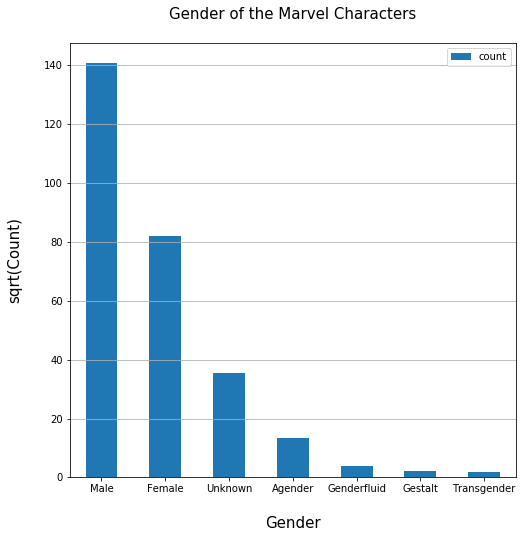

In [6]:
Gender_df = pd.DataFrame(marvel_pers['Gender'].value_counts())\
              .reset_index()
Gender_df.columns = ['Gender', 'count']
Gender_df['count'] = Gender_df['count'].apply(lambda x: math.sqrt(x))\
                                       .round(2)
ax = Gender_df.plot.bar(x='Gender', y='count', rot=0, figsize=(8,8))
ax.set_xlabel('\nGender', fontsize=15)
ax.set_ylabel('sqrt(Count)\n', fontsize=15)
ax.set_title('Gender of the Marvel Characters\n', fontsize=15)
plt.grid(axis='y')

In [7]:
dc_pers = pd.read_pickle("data_pickle/dc_pers_clean1.txt")

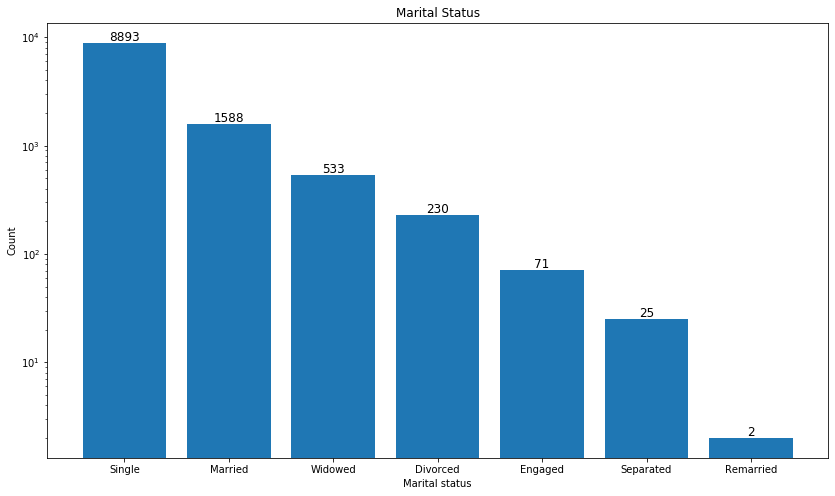

In [8]:
nb_unknown = dc_pers["Marital Status"].value_counts()['Unknown']
hist_marital = dc_pers["Marital Status"].value_counts().drop('Unknown')

# Plot histogram
fig, axs = plt.subplots(1, 1, figsize=(14,8))
axs.bar(x = hist_marital.index, height = hist_marital);
axs.set_title('Marital Status')
axs.set_xlabel('Marital status')
axs.set_ylabel('Count')
axs.set_yscale('log')
for i, v in enumerate(hist_marital):
    axs.text(hist_marital.index[i], v*1.05, str(v), color='black', fontsize=12, horizontalalignment='center')

([<matplotlib.axis.XTick at 0xd54af08>,
 <a list of 24 Text xticklabel objects>)

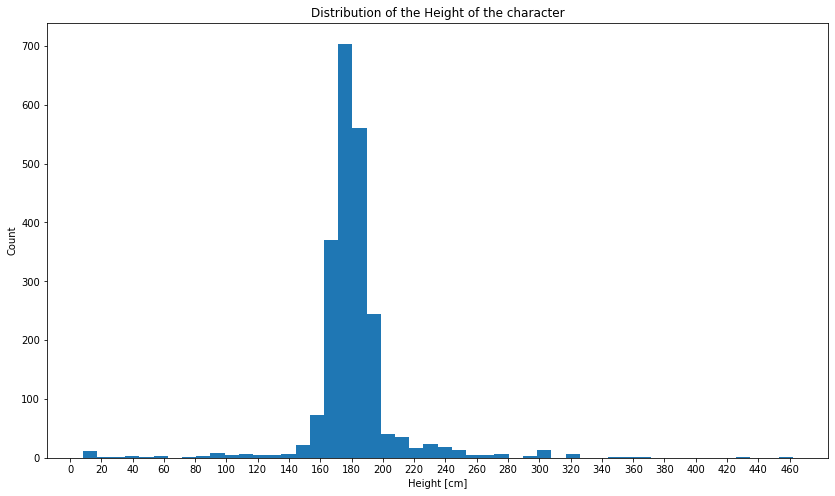

In [9]:
# Plot the distribution of height

# Number of unknown and variable
nb_unknown = dc_pers["Height"].value_counts()['Unknown']
#filter the data to avoid outliers
height_hist = dc_pers[(dc_pers["Height in float"]!=np.nan)\
                         &(dc_pers["Height in float"]<500)]['Height in float']

# Plot histogram
fig, axs = plt.subplots(1, 1, figsize=(14,8))
axs.hist(height_hist,bins=50);
axs.set_title('Distribution of the Height of the character')
axs.set_xlabel('Height [cm]')
axs.set_ylabel('Count')
plt.xticks(np.arange(0, max(height_hist)+10, 20.0))

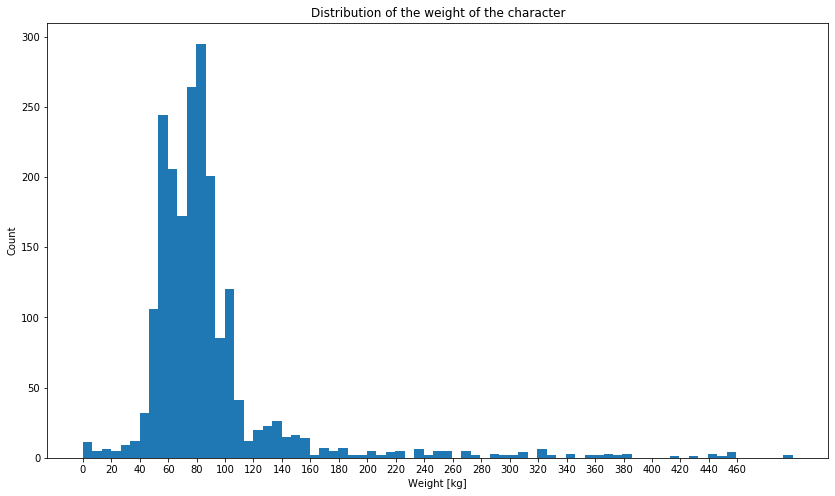

In [10]:
# Plot the distribution of Weight

# Number of unknown and variable
nb_unknown = dc_pers["Weight"].value_counts()['Unknown']+dc_pers["Weight"].value_counts()['Variable ']
# Filter the data to avoid outliers
weight_hist = dc_pers[(dc_pers["Weight in float"]!=np.nan)\
                         &(dc_pers["Weight in float"]<500)]['Weight in float']

# Plot histogram
fig, axs = plt.subplots(1, 1, figsize=(14,8))
axs.hist(weight_hist,bins=75);
axs.set_title('Distribution of the weight of the character')
axs.set_xlabel('Weight [kg]')
axs.set_ylabel('Count')
plt.xticks(np.arange(0, max(height_hist)+10, 20.0));

In [11]:
dc_pers['URL'] = dc_pers['URL'].str.split('//', expand=True)[2]
dc_pers.head(5)

,URL,Real Name,Identity,Current Alias,Citizenship,Good or Bad,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth,Height in string,Height in float,Weight in string,Weight in float
0,wiki/Adam_Blake_(The_Nail),Adam Blake,Secret Identity,Captain Comet,Unknown,Good,Unknown,Unknown,Unknown,Male,Unknown,Unknown,Hazel,Brown,Unknown,Unknown,NaN,Unknown,NaN
1,wiki/Ada_LaBostrie_(New_Earth),Ada LaBostrie,Public Identity,Ada LaBostrie,American,Good,Married,Housewife,Unknown,Female,Unknown,Unknown,Brown,Black,Unknown,Unknown,NaN,Unknown,NaN
2,wiki/Adellca_(New_Earth),Adellca,Secret Identity,Green Lantern,Unknown,Good,Single,Green Lantern,Unknown,Female,Unknown,Unknown,Black,Black,Unknown,Unknown,NaN,Unknown,NaN
3,wiki/A-1_(Prime_Earth),Artificial Intelligence Data Flow,Unknown,A-I,Unknown,Good,Single,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN
4,wiki/Ace_Egan_(Quality_Universe),Ace Egan,Secret Identity,Ace of Space,Unknown,Good,Unknown,Unknown,Unknown,Male,Unknown,Unknown,Unknown,Unknown,New York,Unknown,NaN,Unknown,NaN


In [12]:
dc_comics = pd.read_pickle("comics_dc.txt")
dc_comics.reset_index()\
         .drop(columns=['index'])\
         .head()

,URL,Good characters,Bad characters,Neutral characters,Editor-in-chief,Editor-in-chief URL,Writer,Writer URL,Publication date,Subcomic
0,/wiki/100_Bullets_Vol_1_64,", /wiki/Jack_Daw_(100_Bullets), /wiki/Philip_G...",,,", Karen Berger",", /wiki/Karen_Berger",,,"November, 2005",The Dive
1,/wiki/100_Bullets_Vol_1_25,", /wiki/Augustus_Medici_(100_Bullets), /wiki/B...",,,", Karen Berger",", /wiki/Karen_Berger",,,"August, 2001",Red Prince Blues (Part III of III)
2,/wiki/2020_Visions_Vol_1_5,,,,", Karen Berger",", /wiki/Karen_Berger",", Ron Marz",", /wiki/Ron_Marz","September, 1997",
3,/wiki/100%25_True%3F_Vol_1_2,,,,", Jenette Kahn",", /wiki/Jenette_Kahn",", Ron Marz",", /wiki/Ron_Marz","December, 1997",
4,/wiki/100_Bullets_Vol_1_11,", /wiki/Philip_Graves_(100_Bullets)",,,", Karen Berger",", /wiki/Karen_Berger",,,"June, 2000","Heartbreak, Sunny Side Up"


In [13]:
#Create a dataframe centered on the good characters
good = dc_comics[['Good characters', 'Publication date']]
good = good.reset_index(drop = True)
good.columns = ['Good_characters', 'Publication_date']
#Split the Good characters one by one with the explode function (requires Pandas version >= 0.25)
good = good.assign(Good_characters = good['Good_characters'].str.split(', /')).explode('Good_characters')
#Replace the empty Good_characters cells with Nan in order to drop them
good['Good_characters'].replace('', np.nan, inplace=True)
good.dropna(subset=['Good_characters'], inplace=True)
good = good.reset_index(drop = True)
good.head(5)

,Good_characters,Publication_date
0,wiki/Jack_Daw_(100_Bullets),"November, 2005"
1,wiki/Philip_Graves_(100_Bullets),"November, 2005"
2,wiki/Augustus_Medici_(100_Bullets),"August, 2001"
3,wiki/Benito_Medici_(100_Bullets),"August, 2001"
4,wiki/Cole_Burns_(100_Bullets),"August, 2001"


In [14]:
#Create a dataframe centered on the bad characters
bad = dc_comics[['Bad characters', 'Publication date']]
bad = bad.reset_index(drop = True)
bad.columns = ['Bad_characters', 'Publication_date']
#Split the Bad characters one by one with the explode function (requires Pandas version >= 0.25)
bad = bad.assign(Bad_characters = bad['Bad_characters'].str.split(', /')).explode('Bad_characters')
#Replace the empty Bad_characters cells with Nan in order to drop them
bad['Bad_characters'].replace('', np.nan, inplace=True)
bad.dropna(subset=['Bad_characters'], inplace=True)
bad = bad.reset_index(drop = True)
bad.head(5)

,Bad_characters,Publication_date
0,wiki/Uxas_(New_Earth),"April, 1976"
1,wiki/Doctor_Bedlam_(New_Earth),"April, 1976"
2,wiki/Granny_Goodness_(New_Earth),"April, 1976"
3,wiki/Kalibak_(New_Earth),"April, 1976"
4,wiki/Parademons,"April, 1976"


In [15]:
#Create a dataframe centered on the neutral characters
neutral = dc_comics[['Neutral characters', 'Publication date']]
neutral = neutral.reset_index(drop = True)
neutral.columns = ['Neutral_characters', 'Publication_date']
#Split the Neutral characters one by one with the explode function (requires Pandas version >= 0.25)
neutral = neutral.assign(Neutral_characters = neutral['Neutral_characters'].str.split(', /')).explode('Neutral_characters')
#Replace the empty Neutral_characters cells with Nan in order to drop them
neutral['Neutral_characters'].replace('', np.nan, inplace=True)
neutral.dropna(subset=['Neutral_characters'], inplace=True)
neutral = neutral.reset_index(drop = True)
neutral.head(5)

,Neutral_characters,Publication_date
0,wiki/Megan_Dietrich_(100_Bullets),"March, 2002"
1,wiki/Megan_Dietrich_(100_Bullets),"June, 2002"
2,wiki/Anwar_Madrid_(100_Bullets),"October, 2004"
3,wiki/Loop_Hughes_(100_Bullets),"February, 2009"
4,wiki/Jack_Daw_(100_Bullets),"February, 2009"


In [16]:
#Create a list of the bad, good and neutral characters, and one on the DC characters
goodList = list(good['Good_characters'])
badList = list(bad['Bad_characters'])
neutralList = list(neutral['Neutral_characters'])
wiki_dc_pers_list = list(dc_pers['URL'])
#Find the shortest list for the search
list_name = ['goodList','wiki_dc_pers_list','badList','neutralList']
print('Shortest list is:',list_name[np.argmin([len(goodList), len(wiki_dc_pers_list), len(badList), len(neutralList)])])

Shortest list is: wiki_dc_pers_list


In [17]:
good_count = [] #List of how often a character is listed as "good"
bad_count  = [] #List of how often a character is listed as "bad"
neutral_count  = [] #List of how often a character is listed as "neutral"
publicationList = [[] for i in range(len(wiki_dc_pers_list))] #Create list of lists for publication dates
#Look for the characters that appear both in wiki_pers_dc_list and goodList
for i, pers in enumerate(wiki_dc_pers_list):
    #We first consider that every character is neither good, bad nor neutral
    good_count.append(0)
    bad_count.append(0)
    neutral_count.append(0)
    
    if pers in goodList:
        good_count[i] = goodList.count(pers)        #Count number of times the chacarter appears in goodList
        index = 0
        goodList_copy = goodList
        for j in range(good_count[i]):              #Find the index and update the publication dates list )
            index += goodList_copy.index(pers)
            if j>0:
                index += 1
            publicationList[i].append(good['Publication_date'][index])
            goodList_copy = goodList_copy[goodList_copy.index(pers)+1:]
    
    if pers in badList:
        bad_count[i] = badList.count(pers)         #Count number of times the chacarter appears in badList
        index = 0
        badList_copy = badList
        for j in range(bad_count[i]):              #Find the index and update the publication dates list 
            index += badList_copy.index(pers)
            if j>0:
                index += 1
            publicationList[i].append(bad['Publication_date'][index])
            badList_copy = badList_copy[badList_copy.index(pers)+1:]
    
    if pers in neutralList:
        neutral_count[i] =neutralList.count(pers)        #Count number of times the chacarter appears in neutralList
        index = 0
        neutralList_copy = neutralList
        for j in range(neutral_count[i]):                #Find the index and update the publication dates list 
            index += neutralList_copy.index(pers)
            if j>0:
                index += 1
            publicationList[i].append(neutral['Publication_date'][index])
            neutralList_copy = neutralList_copy[neutralList_copy.index(pers)+1:]

In [18]:
zippedList =  list(zip(wiki_dc_pers_list, good_count, bad_count, neutral_count, publicationList))
df_pers_final = pd.DataFrame(zippedList, columns = ['URL' , 'Good_count', 'Bad_count', 'Neutral_count', 'Dates']) 
#Merge the df_pers_final dataframe with the dc_pers_df dataframe on the wiki_dc_pers column
dc_pers = dc_pers.merge(df_pers_final, on='URL')
dc_pers.head(10)

,URL,Real Name,Identity,Current Alias,Citizenship,Good or Bad,Marital Status,Occupation,Education,Gender,...,Hair,Place of Birth,Height in string,Height in float,Weight in string,Weight in float,Good_count,Bad_count,Neutral_count,Dates
0,wiki/Adam_Blake_(The_Nail),Adam Blake,Secret Identity,Captain Comet,Unknown,Good,Unknown,Unknown,Unknown,Male,...,Brown,Unknown,Unknown,NaN,Unknown,NaN,0,0,1,"[September, 2004]"
1,wiki/Ada_LaBostrie_(New_Earth),Ada LaBostrie,Public Identity,Ada LaBostrie,American,Good,Married,Housewife,Unknown,Female,...,Black,Unknown,Unknown,NaN,Unknown,NaN,0,0,0,[]
2,wiki/Adellca_(New_Earth),Adellca,Secret Identity,Green Lantern,Unknown,Good,Single,Green Lantern,Unknown,Female,...,Black,Unknown,Unknown,NaN,Unknown,NaN,1,0,0,"[September, 2011]"
3,wiki/A-1_(Prime_Earth),Artificial Intelligence Data Flow,Unknown,A-I,Unknown,Good,Single,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,NaN,Unknown,NaN,1,0,0,"[December, 2013]"
4,wiki/Ace_Egan_(Quality_Universe),Ace Egan,Secret Identity,Ace of Space,Unknown,Good,Unknown,Unknown,Unknown,Male,...,Unknown,New York,Unknown,NaN,Unknown,NaN,2,0,0,"[February, 1941, November, 1940]"
5,wiki/Abigail_Cable_(The_Nail),Abigail Cable,Unknown,Unknown,Unknown,Good,Unknown,Unknown,Unknown,Female,...,White,Unknown,Unknown,NaN,Unknown,NaN,0,0,1,"[October, 1998]"
6,wiki/Abraham_Arlington_(New_Earth),Abraham Arlington,Unknown,Azrael,British,Good,Unknown,Unknown,Unknown,Male,...,Unknown,Unknown,Unknown,NaN,Unknown,NaN,0,0,0,[]
7,wiki/Abisha_(Prime_Earth),Abisha (surname unknown),Public Identity,Abisha,Unknown,Good,Single,Bodyguard,Unknown,Male,...,Bald,Unknown,Unknown,NaN,Unknown,NaN,0,0,0,[]
8,wiki/Alan_Scott_(DC_Universe_Online),Alan Scott,Secret Identity,Green Lantern,American,Good,Unknown,Unknown,Unknown,Male,...,Blond,Unknown,Unknown,NaN,Unknown,NaN,2,0,1,"[December, 2011, October, 2011, May, 2012]"
9,wiki/Adam_Strange_(Krypton_TV_Series),Adam Strange,Public Identity,Unknown,American,Good,Unknown,Unknown,College (abandoned),Male,...,Light Brown,Earth,Unknown,NaN,Unknown,NaN,0,0,0,[]


***The characters that have 0 in all three columns is because they appear in TV series and not in comics, and TV series have not been parsed. Moreover, these columns were already empty in the inital dc_comics dataframe***

In [19]:
#This function allows us to find the years within a list of date strings
def find_years(string):
   # getting numbers from string  
    temp = re.findall(r'\d+', string) 
    res = list(map(int, temp))
    return res

In [20]:
#Get values from three count columns and find the index of the maximum count per rows
count_array = dc_pers[['Good_count','Bad_count','Neutral_count']].values
dc_pers['Behavior'] = list(np.argmax(count_array, axis=1))
#Define a behavior map and create the Behavior 
behavior_map={0:'Good',1:'Bad',2:'Neutral'}
dc_pers['Behavior'] = dc_pers['Behavior'].map(behavior_map)

#Get the number of apparition of the character based on the number of publications related to this character
dc_pers['Number_of_apparitions'] = dc_pers['Dates'].apply(lambda x: len(x))

#
dc_pers['DatesString'] = dc_pers['Dates'].apply(lambda x: ','.join(map(str, x)))
dc_pers['years'] = dc_pers['DatesString'].apply(lambda x: find_years(x))
dc_pers['First_apparition'] = dc_pers['years'].apply(lambda x: min(x) if len(x)!=0 else None)
dc_pers.head()

dc_pers.head(10)

,URL,Real Name,Identity,Current Alias,Citizenship,Good or Bad,Marital Status,Occupation,Education,Gender,...,Weight in float,Good_count,Bad_count,Neutral_count,Dates,Behavior,Number_of_apparitions,DatesString,years,First_apparition
0,wiki/Adam_Blake_(The_Nail),Adam Blake,Secret Identity,Captain Comet,Unknown,Good,Unknown,Unknown,Unknown,Male,...,NaN,0,0,1,"[September, 2004]",Neutral,1,"September, 2004",[2004],2004.0
1,wiki/Ada_LaBostrie_(New_Earth),Ada LaBostrie,Public Identity,Ada LaBostrie,American,Good,Married,Housewife,Unknown,Female,...,NaN,0,0,0,[],Good,0,,[],NaN
2,wiki/Adellca_(New_Earth),Adellca,Secret Identity,Green Lantern,Unknown,Good,Single,Green Lantern,Unknown,Female,...,NaN,1,0,0,"[September, 2011]",Good,1,"September, 2011",[2011],2011.0
3,wiki/A-1_(Prime_Earth),Artificial Intelligence Data Flow,Unknown,A-I,Unknown,Good,Single,Unknown,Unknown,Unknown,...,NaN,1,0,0,"[December, 2013]",Good,1,"December, 2013",[2013],2013.0
4,wiki/Ace_Egan_(Quality_Universe),Ace Egan,Secret Identity,Ace of Space,Unknown,Good,Unknown,Unknown,Unknown,Male,...,NaN,2,0,0,"[February, 1941, November, 1940]",Good,2,"February, 1941,November, 1940","[1941, 1940]",1940.0
5,wiki/Abigail_Cable_(The_Nail),Abigail Cable,Unknown,Unknown,Unknown,Good,Unknown,Unknown,Unknown,Female,...,NaN,0,0,1,"[October, 1998]",Neutral,1,"October, 1998",[1998],1998.0
6,wiki/Abraham_Arlington_(New_Earth),Abraham Arlington,Unknown,Azrael,British,Good,Unknown,Unknown,Unknown,Male,...,NaN,0,0,0,[],Good,0,,[],NaN
7,wiki/Abisha_(Prime_Earth),Abisha (surname unknown),Public Identity,Abisha,Unknown,Good,Single,Bodyguard,Unknown,Male,...,NaN,0,0,0,[],Good,0,,[],NaN
8,wiki/Alan_Scott_(DC_Universe_Online),Alan Scott,Secret Identity,Green Lantern,American,Good,Unknown,Unknown,Unknown,Male,...,NaN,2,0,1,"[December, 2011, October, 2011, May, 2012]",Good,3,"December, 2011,October, 2011,May, 2012","[2011, 2011, 2012]",2011.0
9,wiki/Adam_Strange_(Krypton_TV_Series),Adam Strange,Public Identity,Unknown,American,Good,Unknown,Unknown,College (abandoned),Male,...,NaN,0,0,0,[],Good,0,,[],NaN


In [23]:
pickle.dump(dc_pers, open('data_pickle/dc_pers_final.txt','wb'))

***We are going to repeat the same procedure with the Marvel dataset***

In [24]:
marvel_pers.head(5)

,URL,Real Name,Identity,Current Alias,Citizenship,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth,Height in string,Height in float,Weight in string,Weight in float
0,/wiki/Aaron_the_Aakon_(Earth-616),Aaron,Secret Identity,Unknown,Aakon,Single,Slave trader,Unknown,Male,Unknown,Unknown,Brown,Black,Planet Oorga,Unknown,NaN,Unknown,NaN
1,/wiki/2-D_(Earth-616),Darell (full name unrevealed),Secret Identity,2-D,American,Single,Adventurer,Unknown,Male,Unknown,Unknown,Brown,Brown,Unknown,Unknown,NaN,Unknown,NaN
2,/wiki/Abraham_Erskine_(Earth-616),Abraham Erskine,Known to Authorities Identity,Dr. Joseph Reinstein,"German, American",Married,Scientist,Advanced College Degree,Male,"5' 6"" (1.68 m)",160 lbs (73 kg),Brown,Black,Germany,168.0,168.0,72.0,72.0
3,/wiki/11-Ball_(Earth-616),Unknown,Secret Identity,11-Ball,American,Single,Professional criminal; former henchman,Unknown,Male,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN
4,/wiki/Abraham_(Earth-616),Abraham,No Dual Identity,Unknown,Unknown,Married,Prophet,Unknown,Male,Unknown,Unknown,Unknown,Black,Unknown,Unknown,NaN,Unknown,NaN


In [25]:
marvel_comics = pd.read_pickle("data_pickle/comics_marvel.txt")
marvel_comics.reset_index()\
         .drop(columns=['index'])\
         .head(5)

,URL,Good characters,Bad characters,Neutral characters,Editor-in-chief,Editor-in-chief URL,Writer,Writer URL,Publication date,Subcomic
0,/wiki/Marvel_Mystery_Comics_Vol_1_NN,,,,,,", Joe Caramagna",", /wiki/Joe_Caramagna","January, 1943",st stor
1,/wiki/Comedy_Comics_Vol_1_12,,,,", Stan Lee",", /wiki/Stan_Lee",,,"December, 1942",Morphy
2,/wiki/Marvel_Mystery_Comics_Vol_1_7,", /wiki/Human_Torch_(Android)_(Earth-616), /wi...",", /wiki/Roglo_(Earth-616), #cite_note-Only_App...",", /wiki/New_York_City_Police_Department_(Earth...",", Joe Simon",", /wiki/Joe_Simon",", Stan Lee, Larry Lieber",", /wiki/Stan_Lee, /wiki/Larry_Lieber","May, 1940",The Human Torch
3,/wiki/Marvel_Mystery_Comics_Vol_1_7,", /wiki/Thomas_Halloway_(Earth-616), /wiki/Bet...",", /wiki/Emma_Martin_(Earth-616)",", /wiki/Henry_Martin_(Earth-616)",", Joe Simon",", /wiki/Joe_Simon",", Paul Gustavson, Ray Gill",", /wiki/Paul_Gustavson, /wiki/Ray_Gill","May, 1940",The Angel: Master of Men
4,/wiki/Marvel_Mystery_Comics_Vol_1_7,", /wiki/Namor_McKenzie_(Earth-616), /wiki/Thak...",,", /wiki/Homo_mermanus, /wiki/New_York_City_Pol...",", Joe Simon",", /wiki/Joe_Simon",", William Blake Everett",", /wiki/William_Blake_Everett","May, 1940","Prince Namor, the Sub-Mariner"


In [26]:
#Create a dataframe centered on the good characters
good = marvel_comics[['Good characters', 'Publication date']]
good = good.reset_index(drop = True)
good.columns = ['Good_characters', 'Publication_date']
#Split the Good characters one by one with the explode function (requires Pandas version >= 0.25)
good = good.assign(Good_characters = good['Good_characters'].str.split(', ')).explode('Good_characters')
#Replace the empty Good_characters cells with Nan in order to drop them
good['Good_characters'].replace('', np.nan, inplace=True)
good.dropna(subset=['Good_characters'], inplace=True)
good = good.reset_index(drop = True)
good.head(5)

,Good_characters,Publication_date
0,/wiki/Human_Torch_(Android)_(Earth-616),"May, 1940"
1,/wiki/New_York_City_Police_Department_(Earth-616),"May, 1940"
2,/wiki/Pete_Johnson_(Earth-616),"May, 1940"
3,/wiki/Thomas_Halloway_(Earth-616),"May, 1940"
4,/wiki/Betty_Martin_(Earth-616),"May, 1940"


In [27]:
#Create a dataframe centered on the bad characters
bad = marvel_comics[['Bad characters', 'Publication date']]
bad = bad.reset_index(drop = True)
bad.columns = ['Bad_characters', 'Publication_date']
#Split the Bad characters one by one with the explode function (requires Pandas version >= 0.25)
bad = bad.assign(Bad_characters = bad['Bad_characters'].str.split(', ')).explode('Bad_characters')
#Replace the empty Bad_characters cells with Nan in order to drop them
bad['Bad_characters'].replace('', np.nan, inplace=True)
bad.dropna(subset=['Bad_characters'], inplace=True)
bad = bad.reset_index(drop = True)
bad.head(5)

,Bad_characters,Publication_date
0,/wiki/Roglo_(Earth-616),"May, 1940"
1,#cite_note-Only_Appearance-0,"May, 1940"
2,/wiki/Emma_Martin_(Earth-616),"May, 1940"
3,/wiki/Boss_Sapro_(Earth-616),"May, 1940"
4,/wiki/Edward_Hurt_(Earth-616),"May, 1940"


In [28]:
#Create a dataframe centered on the neutral characters
neutral = marvel_comics[['Neutral characters', 'Publication date']]
neutral = neutral.reset_index(drop = True)
neutral.columns = ['Neutral_characters', 'Publication_date']
#Split the Neutral characters one by one with the explode function (requires Pandas version >= 0.25)
neutral = neutral.assign(Neutral_characters = neutral['Neutral_characters'].str.split(', ')).explode('Neutral_characters')
#Replace the empty Neutral_characters cells with Nan in order to drop them
neutral['Neutral_characters'].replace('', np.nan, inplace=True)
neutral.dropna(subset=['Neutral_characters'], inplace=True)
neutral = neutral.reset_index(drop = True)
neutral.head(5)

,Neutral_characters,Publication_date
0,/wiki/New_York_City_Police_Department_(Earth-616),"May, 1940"
1,/wiki/Henry_Martin_(Earth-616),"May, 1940"
2,/wiki/Homo_mermanus,"May, 1940"
3,/wiki/New_York_City_Police_Department_(Earth-616),"May, 1940"
4,/wiki/Fiorello_La_Guardia_(Earth-616),"May, 1940"


In [29]:
#Create a list of the bad, good and neutral characters, and one on the DC characters
goodList = list(good['Good_characters'])
badList = list(bad['Bad_characters'])
neutralList = list(neutral['Neutral_characters'])
wiki_marvel_pers_list = list(marvel_pers['URL'])
#Find the shortest list for the search
list_name = ['goodList','wiki_marvel_pers_list','badList','neutralList']
print('Shortest list is:',list_name[np.argmin([len(goodList), len(wiki_marvel_pers_list), len(badList), len(neutralList)])])

Shortest list is: wiki_marvel_pers_list


In [30]:
good_count = [] #List of how often a character is listed as "good"
bad_count  = [] #List of how often a character is listed as "bad"
neutral_count  = [] #List of how often a character is listed as "neutral"
publicationList = [[] for i in range(len(wiki_marvel_pers_list))] #Create list of lists for publication dates
#Look for the characters that appear both in wiki_pers_dc_list and goodList
for i, pers in enumerate(wiki_marvel_pers_list):
    #We first consider that every character is neither good, bad nor neutral
    good_count.append(0)
    bad_count.append(0)
    neutral_count.append(0)
    
    if pers in goodList:
        good_count[i] = goodList.count(pers)        #Count number of times the chacarter appears in goodList
        index = 0
        goodList_copy = goodList
        for j in range(good_count[i]):              #Find the index and update the publication dates list )
            index += goodList_copy.index(pers)
            if j>0:
                index += 1
            publicationList[i].append(good['Publication_date'][index])
            goodList_copy = goodList_copy[goodList_copy.index(pers)+1:]
    
    if pers in badList:
        bad_count[i] = badList.count(pers)         #Count number of times the chacarter appears in badList
        index = 0
        badList_copy = badList
        for j in range(bad_count[i]):              #Find the index and update the publication dates list 
            index += badList_copy.index(pers)
            if j>0:
                index += 1
            publicationList[i].append(bad['Publication_date'][index])
            badList_copy = badList_copy[badList_copy.index(pers)+1:]
    
    if pers in neutralList:
        neutral_count[i] =neutralList.count(pers)        #Count number of times the chacarter appears in neutralList
        index = 0
        neutralList_copy = neutralList
        for j in range(neutral_count[i]):                #Find the index and update the publication dates list 
            index += neutralList_copy.index(pers)
            if j>0:
                index += 1
            publicationList[i].append(neutral['Publication_date'][index])
            neutralList_copy = neutralList_copy[neutralList_copy.index(pers)+1:]

In [31]:
zippedList =  list(zip(wiki_marvel_pers_list, good_count, bad_count, neutral_count, publicationList))
marvel_pers_final = pd.DataFrame(zippedList, columns = ['URL' , 'Good_count', 'Bad_count', 'Neutral_count', 'Dates']) 
#Merge the marvel_pers_final dataframe with the marvel_pers_df dataframe on the URL column
marvel_pers = marvel_pers.merge(marvel_pers_final, on='URL')
marvel_pers.head(10)

,URL,Real Name,Identity,Current Alias,Citizenship,Marital Status,Occupation,Education,Gender,Height,...,Hair,Place of Birth,Height in string,Height in float,Weight in string,Weight in float,Good_count,Bad_count,Neutral_count,Dates
0,/wiki/Aaron_the_Aakon_(Earth-616),Aaron,Secret Identity,Unknown,Aakon,Single,Slave trader,Unknown,Male,Unknown,...,Black,Planet Oorga,Unknown,NaN,Unknown,NaN,0,0,0,[]
1,/wiki/2-D_(Earth-616),Darell (full name unrevealed),Secret Identity,2-D,American,Single,Adventurer,Unknown,Male,Unknown,...,Brown,Unknown,Unknown,NaN,Unknown,NaN,4,0,0,"[January, 2008, July, 2011, September, 2011, J..."
2,/wiki/Abraham_Erskine_(Earth-616),Abraham Erskine,Known to Authorities Identity,Dr. Joseph Reinstein,"German, American",Married,Scientist,Advanced College Degree,Male,"5' 6"" (1.68 m)",...,Black,Germany,168.0,168.0,72.0,72.0,40,1,50,"[March, 1941, November, 1946, March, 1965, Jan..."
3,/wiki/11-Ball_(Earth-616),Unknown,Secret Identity,11-Ball,American,Single,Professional criminal; former henchman,Unknown,Male,Unknown,...,Unknown,Unknown,Unknown,NaN,Unknown,NaN,0,1,0,"[July, 1991]"
4,/wiki/Abraham_(Earth-616),Abraham,No Dual Identity,Unknown,Unknown,Married,Prophet,Unknown,Male,Unknown,...,Black,Unknown,Unknown,NaN,Unknown,NaN,1,0,6,"[December, 1953, February, 1954, December, 195..."
5,/wiki/Abarac_(Earth-616),Abarac,No Dual Identity,Unknown,Cybernian,Single,"Court magician, advisor",Unknown,Male,Unknown,...,White,Unknown,Unknown,NaN,Unknown,NaN,1,0,0,"[November, 1970]"
6,/wiki/Abdul_Faoul_(Earth-616),Professor Abdul Faoul,Secret Identity,Scarlet Scarab,Egyptian,Single,"Archeologist, adventurer",Unknown,Male,Unknown,...,Black,Egypt,Unknown,NaN,Unknown,NaN,0,4,3,"[December, 1977, February, 1978, June, 2014, J..."
7,/wiki/A.C._O%27Connor_(Earth-616),A. C. O'Connor,No Dual Identity,Ace O'Connor,American,Single,Journalist,Unknown,Female,Unknown,...,Blond,Unknown,Unknown,NaN,Unknown,NaN,0,0,5,"[September, 1980, October, 1980, December, 198..."
8,/wiki/7-X9_(Earth-616),Unknown,No Dual Identity,7-X9,Unknown,Unknown,Unknown,Unknown,Male,Unknown,...,Unknown,Unknown,Unknown,NaN,Unknown,NaN,0,1,0,"[March, 2016]"
9,/wiki/803_(Earth-616),803,No Dual Identity,Unknown,Unknown,Single,Unknown,Unknown,Agender,Unknown,...,Unknown,Unknown,Unknown,NaN,Unknown,NaN,14,0,1,"[February, 2016, January, 2016, March, 2016, A..."


In [34]:
#Get values from three count columns and find the index of the maximum count per rows
count_array = marvel_pers[['Good_count','Bad_count','Neutral_count']].values
marvel_pers['Behavior'] = list(np.argmax(count_array, axis=1))
#Define a behavior map and create the Behavior 
behavior_map={0:'Good',1:'Bad',2:'Neutral'}
marvel_pers['Behavior'] = marvel_pers['Behavior'].map(behavior_map)

#Get the number of apparition of the character based on the number of publications related to this character
marvel_pers['Number_of_apparitions'] = marvel_pers['Dates'].apply(lambda x: len(x))

#
marvel_pers['DatesString'] = marvel_pers['Dates'].apply(lambda x: ','.join(map(str, x)))
marvel_pers['years'] = marvel_pers['DatesString'].apply(lambda x: find_years(x))
marvel_pers['First_apparition'] = marvel_pers['years'].apply(lambda x: min(x) if len(x)!=0 else None)
marvel_pers.head()

marvel_pers.head(10)

,URL,Real Name,Identity,Current Alias,Citizenship,Marital Status,Occupation,Education,Gender,Height,...,Weight in float,Good_count,Bad_count,Neutral_count,Dates,Behavior,Number_of_apparitions,DatesString,years,First_apparition
0,/wiki/Aaron_the_Aakon_(Earth-616),Aaron,Secret Identity,Unknown,Aakon,Single,Slave trader,Unknown,Male,Unknown,...,NaN,0,0,0,[],Good,0,,[],NaN
1,/wiki/2-D_(Earth-616),Darell (full name unrevealed),Secret Identity,2-D,American,Single,Adventurer,Unknown,Male,Unknown,...,NaN,4,0,0,"[January, 2008, July, 2011, September, 2011, J...",Good,4,"January, 2008,July, 2011,September, 2011,Janua...","[2008, 2011, 2011, 2019]",2008.0
2,/wiki/Abraham_Erskine_(Earth-616),Abraham Erskine,Known to Authorities Identity,Dr. Joseph Reinstein,"German, American",Married,Scientist,Advanced College Degree,Male,"5' 6"" (1.68 m)",...,72.0,40,1,50,"[March, 1941, November, 1946, March, 1965, Jan...",Neutral,91,"March, 1941,November, 1946,March, 1965,January...","[1941, 1946, 1965, 1969, 1971, 1975, 1976, 197...",1941.0
3,/wiki/11-Ball_(Earth-616),Unknown,Secret Identity,11-Ball,American,Single,Professional criminal; former henchman,Unknown,Male,Unknown,...,NaN,0,1,0,"[July, 1991]",Bad,1,"July, 1991",[1991],1991.0
4,/wiki/Abraham_(Earth-616),Abraham,No Dual Identity,Unknown,Unknown,Married,Prophet,Unknown,Male,Unknown,...,NaN,1,0,6,"[December, 1953, February, 1954, December, 195...",Neutral,7,"December, 1953,February, 1954,December, 1953,N...","[1953, 1954, 1953, 1988, 2011, 2017, 2020]",1953.0
5,/wiki/Abarac_(Earth-616),Abarac,No Dual Identity,Unknown,Cybernian,Single,"Court magician, advisor",Unknown,Male,Unknown,...,NaN,1,0,0,"[November, 1970]",Good,1,"November, 1970",[1970],1970.0
6,/wiki/Abdul_Faoul_(Earth-616),Professor Abdul Faoul,Secret Identity,Scarlet Scarab,Egyptian,Single,"Archeologist, adventurer",Unknown,Male,Unknown,...,NaN,0,4,3,"[December, 1977, February, 1978, June, 2014, J...",Bad,7,"December, 1977,February, 1978,June, 2014,July,...","[1977, 1978, 2014, 2014, 1981, 1982, 2013]",1977.0
7,/wiki/A.C._O%27Connor_(Earth-616),A. C. O'Connor,No Dual Identity,Ace O'Connor,American,Single,Journalist,Unknown,Female,Unknown,...,NaN,0,0,5,"[September, 1980, October, 1980, December, 198...",Neutral,5,"September, 1980,October, 1980,December, 1980,F...","[1980, 1980, 1980, 1981, 1981]",1980.0
8,/wiki/7-X9_(Earth-616),Unknown,No Dual Identity,7-X9,Unknown,Unknown,Unknown,Unknown,Male,Unknown,...,NaN,0,1,0,"[March, 2016]",Bad,1,"March, 2016",[2016],2016.0
9,/wiki/803_(Earth-616),803,No Dual Identity,Unknown,Unknown,Single,Unknown,Unknown,Agender,Unknown,...,NaN,14,0,1,"[February, 2016, January, 2016, March, 2016, A...",Good,15,"February, 2016,January, 2016,March, 2016,April...","[2016, 2016, 2016, 2016, 2016, 2016, 2016, 201...",2016.0


In [ ]:
pickle.dump(marvel_pers, open('data_pickle/marvel_pers_final.txt','wb'))

**Let's sum up what we have achieved until now. We started with 4 very large datasets of the comics and characters of the Marvel and DC universes, where we selected what we needed in each one. We then cleaned the data as much as possible to make it ready to use and analyse.**

**Now the next step is to make use of this data. Indeed, we chose to select some specific characteristics that will help us to get sense of the data. Now the question is how to do it.**

**One first basic thing is to see the distribution of a specific characteristic. Maybe Marvel choose to design tall and skinny characters. Or maybe DC heroes tend to have light color eyes. All these distributions have to be analysed and especially we have to put them in parallel with the alignment of the character, i.e. if he is good or bad. Indeed, we can maybe discover some relationships between a physical portrait of a character and his alignment. We can firstly imagine that most of the heroes will come from the United States (which is of course expected for the two biggest American comics publishers), and will thus have a typical American physical portrait (light skin color for example). On the other hand, villains can be expected to come from different countries and it will be interesting to see what these countries are. We can plot a map of the world with the distribution of the heroes and another one with the distribution of the villains, which we think has a great visual impact and can quickly tell a lot about this data. Moreover some other characteristics aren't physical, like the education, and this can be very important for our analysis. Indeed, let's suppose all the heroes tend to have a very high education profile. We can wonder what impact it could have on people who couldn't get this level education and that try to associate themselves to these heroes. Will it encourage them to reach this high level of education? Or will it on the contrary make them think that it is impossible for them and make them feel bad about themselves? These are part of many of the questions we can wonder about. But of course we will have to carefully analyse the data and choose the right parameters. Let's note that another important characteristic is the gender distribution, and not only for the characters but also for the editors and writers of the comics. We can after that try to see the typical portraits of heroes and villains for both Marvel and DC.**

**However, all this analysis wouldn't be that interesting if we don't include time in our parameters. Indeed, seeing the evolution of a characteristic over time can tell a lot about what the comics writers want to convey through their characters. The typical portraits are probably continuously evolving over time. Maybe the hypothesis we did for example for the most common level of education or the most represented skin color are biased because we didn't include time in our analysis. We can for example discover that the tendencies of citizenship is leaning toward more different countries than the United States. Another example is the more diverse genders: maybe now that we speak more openly in the society about other genders than 'male' or 'female', we could see a greater diversity over time in the characters.**

**Finally, another important thing to do is to compare the Marvel and DC respective analysis. Indeed, we can not limit ourselves to only one of them. Maybe they have completely different ways of designing characters, and thus that the typical portraits for heroes and antiheroes are also completely different. It could also be the contrary since both of them can have the same influences (American culture). It would be our role to discover all of this**

In [ ]:
#